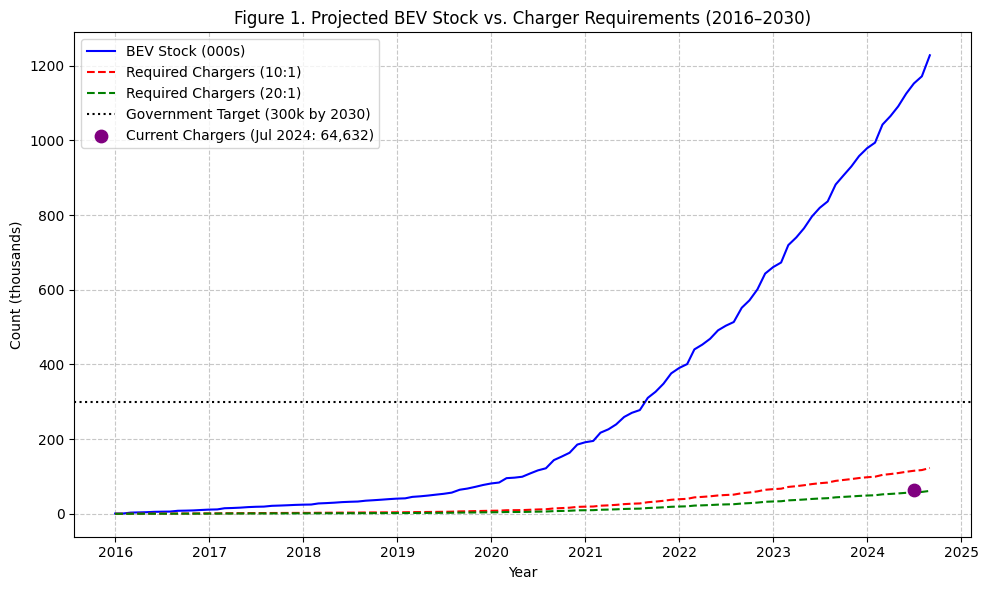

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "Figure1_Input_Data.xlsx"

# Read the sheets
ev_sales = pd.read_excel(file_path, sheet_name="Monthly_EV_Sales", index_col=0, parse_dates=True)
ev_stock = pd.read_excel(file_path, sheet_name="Cumulative_BEV_Stock", index_col=0, parse_dates=True)
charger_raw = pd.read_excel(file_path, sheet_name="Charger_Baseline_Raw")
policy = pd.read_excel(file_path, sheet_name="Policy_Benchmark")

# Extract current charger total (from 2024 baseline)
total_chargers_2024 = policy.loc[policy["Metric"]=="Current Chargers (Jul 2024)", "Value"].values[0]

# Create charger requirement scenarios
required_10 = ev_stock["BEV_Stock"] / 10
required_20 = ev_stock["BEV_Stock"] / 20

# --- Plot ---
plt.figure(figsize=(10,6))

# BEV stock line
plt.plot(ev_stock.index, ev_stock["BEV_Stock"]/1000, label="BEV Stock (000s)", color="blue")

# Charger requirement lines
plt.plot(required_10.index, required_10/1000, linestyle="--", color="red", label="Required Chargers (10:1)")
plt.plot(required_20.index, required_20/1000, linestyle="--", color="green", label="Required Chargers (20:1)")

# Policy target line
plt.axhline(300000/1000, color="black", linestyle=":", label="Government Target (300k by 2030)")

# Current chargers (2024 point)
plt.scatter(pd.Timestamp("2024-07-01"), total_chargers_2024/1000, 
            color="purple", s=80, zorder=5,
            label=f"Current Chargers (Jul 2024: {int(total_chargers_2024):,})")

# Formatting
plt.title("Figure 1. Projected BEV Stock vs. Charger Requirements (2016–2030)")
plt.xlabel("Year")
plt.ylabel("Count (thousands)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

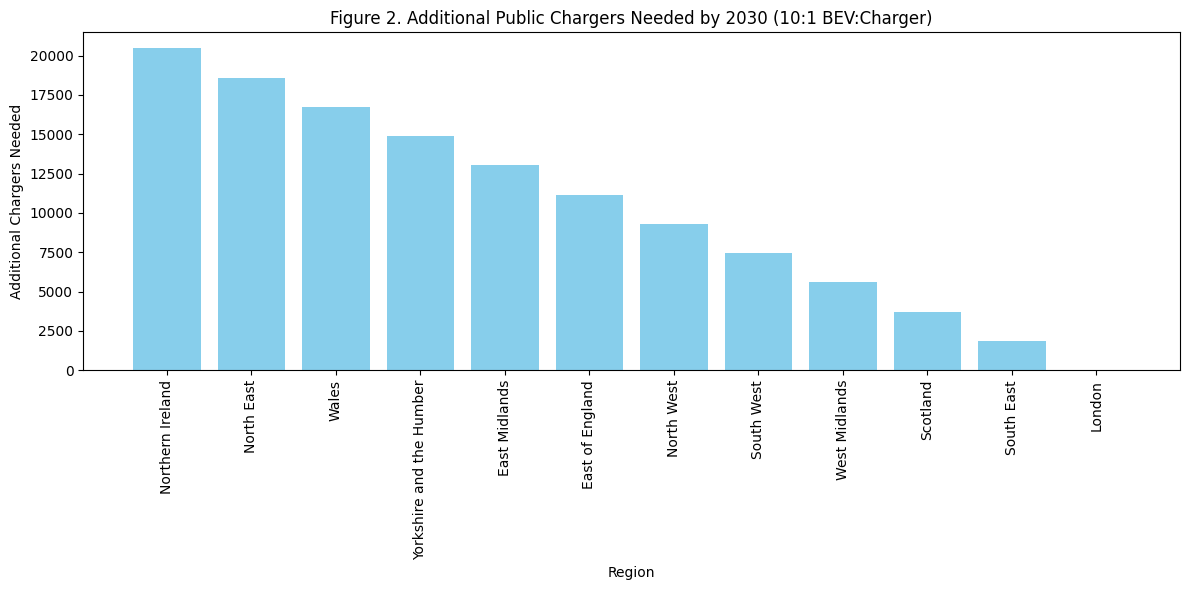

In [14]:
# Load input data
file_path = "Figure1_Input_Data.xlsx"
ev_stock = pd.read_excel(file_path, sheet_name="Cumulative_BEV_Stock", index_col=0, parse_dates=True)
ch_df = pd.read_excel(file_path, sheet_name="Charger_Baseline_Raw")


bev_stock_2030 = ev_stock["BEV_Stock"].iloc[-1]


# First column with strings = Region
region_col = ch_df.select_dtypes(include=['object']).columns[0]
# First numeric column = Chargers
charger_col = ch_df.select_dtypes(include=['number']).columns[0]

# Clean data
ch_clean = ch_df[[region_col, charger_col]].dropna()
ch_clean = ch_clean.rename(columns={region_col: "Region", charger_col: "Chargers"})

# Remove total rows if present
ch_clean = ch_clean[~ch_clean["Region"].str.contains("total", case=False, na=False)].copy()

# Compute regional shares
total_chargers = ch_clean["Chargers"].sum()
ch_clean["Share"] = ch_clean["Chargers"] / total_chargers

# Allocate BEV stock by region (proportional to charger share)
ch_clean["Projected_BEV_2030"] = ch_clean["Share"] * bev_stock_2030

# Required chargers under 10:1
ch_clean["Required_10to1"] = ch_clean["Projected_BEV_2030"] / 10

# Additional chargers needed
ch_clean["Additional_Needed_10to1"] = (ch_clean["Required_10to1"] - ch_clean["Chargers"]).clip(lower=0)

# Sort for plotting
ch_clean = ch_clean.sort_values("Additional_Needed_10to1", ascending=False)

# --- Plot ---
plt.figure(figsize=(12,6))
plt.bar(ch_clean["Region"], ch_clean["Additional_Needed_10to1"], color="skyblue")
plt.xticks(rotation=90)
plt.title("Figure 2. Additional Public Chargers Needed by 2030 (10:1 BEV:Charger)")
plt.xlabel("Region")
plt.ylabel("Additional Chargers Needed")
plt.tight_layout()
plt.show()

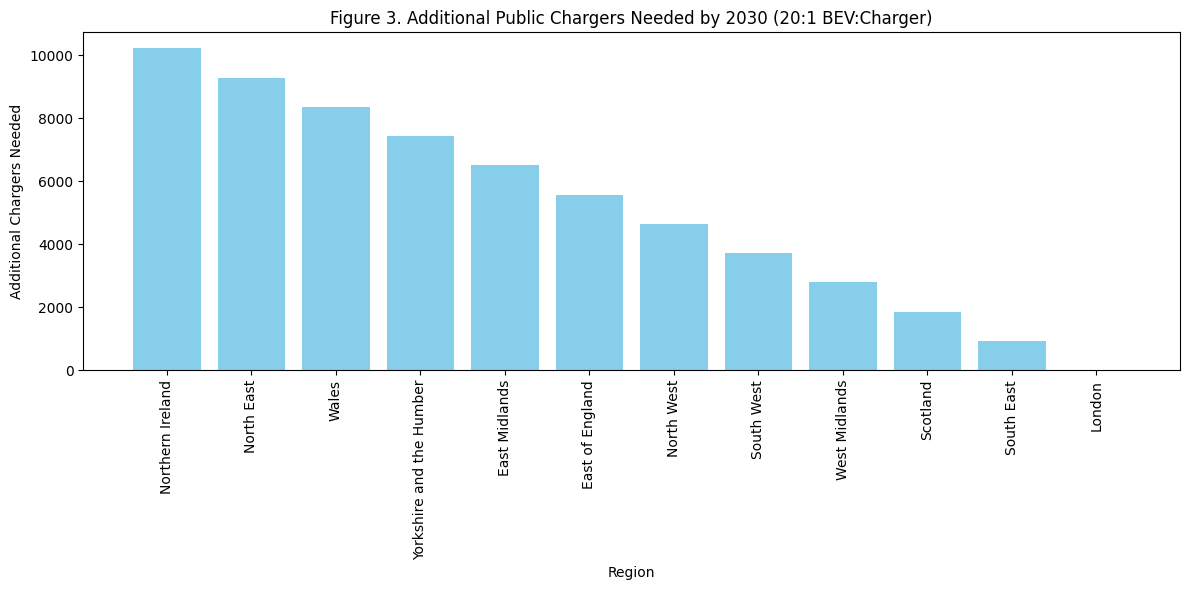

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load input data
file_path = "Figure1_Input_Data.xlsx"
ev_stock = pd.read_excel(file_path, sheet_name="Cumulative_BEV_Stock", index_col=0, parse_dates=True)
ch_df = pd.read_excel(file_path, sheet_name="Charger_Baseline_Raw")

# ✅ Get the last available BEV stock (2030 projection)
bev_stock_2030 = ev_stock["BEV_Stock"].iloc[-1]

# --- Detect columns dynamically ---
region_col = ch_df.select_dtypes(include=['object']).columns[0]   # Region names
charger_col = ch_df.select_dtypes(include=['number']).columns[0] # Charger counts

# Clean data
ch_clean = ch_df[[region_col, charger_col]].dropna()
ch_clean = ch_clean.rename(columns={region_col: "Region", charger_col: "Chargers"})
ch_clean = ch_clean[~ch_clean["Region"].str.contains("total", case=False, na=False)].copy()

# Compute regional shares
total_chargers = ch_clean["Chargers"].sum()
ch_clean["Share"] = ch_clean["Chargers"] / total_chargers

# Allocate BEV stock by region (proportional to charger share)
ch_clean["Projected_BEV_2030"] = ch_clean["Share"] * bev_stock_2030

# Required chargers under 20:1
ch_clean["Required_20to1"] = ch_clean["Projected_BEV_2030"] / 20

# Additional chargers needed
ch_clean["Additional_Needed_20to1"] = (ch_clean["Required_20to1"] - ch_clean["Chargers"]).clip(lower=0)

# Sort for plotting
ch_clean = ch_clean.sort_values("Additional_Needed_20to1", ascending=False)

# --- Plot ---
plt.figure(figsize=(12,6))
plt.bar(ch_clean["Region"], ch_clean["Additional_Needed_20to1"], color="skyblue")  # light blue
plt.xticks(rotation=90)
plt.title("Figure 3. Additional Public Chargers Needed by 2030 (20:1 BEV:Charger)")
plt.xlabel("Region")
plt.ylabel("Additional Chargers Needed")
plt.tight_layout()
plt.show()